# mrbles pipeline example

## Load necessary modules

In [1]:
# Data modules
import os
import numpy as np
import pandas as pd
import xarray as xr

# Load mrbles package
import mrbles

# For standard matplotlib
import matplotlib.pyplot as plt
# Enable plotting in jupyter notebook
%matplotlib inline
# Can also be set to notebook, which makes the graphs interactive, but uses more memory
# %matplotlib notebook
import seaborn as sns  # Makes better looking plots, based on matplotlib

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot  # For plotly offline mode
init_notebook_mode(connected=True)  # Enable plotly to notebook mode

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


In [62]:
import importlib
importlib.reload(mrbles)
importlib.reload(mrbles.core)
importlib.reload(mrbles.data)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image patterns must match.

The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [2]:
image_folders = {"125 nM" : r"C:\DATA\Huy\20180207 CN",
                 "250 nM" : r"C:\DATA\Huy\20180207 CN",
                 "500 nM" : r"C:\DATA\Huy\20180207 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180207 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180207 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"125 nM" : r"20180207_CN_selected_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180207_CN_selected_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180207_CN_selected_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180207_CN_selected_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180207_CN_selected_2uMb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 31 file in 125 nM
Found 27 file in 250 nM
Found 35 file in 500 nM
Found 39 file in 1000 nM
Found 31 file in 2000 nM
Found 29 file in Biotin


In [3]:
mrbles_images.files

{'1000 nM': ['C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_1\\20180207_CN_selected_1uM_1_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_10\\20180207_CN_selected_1uM_10_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_11\\20180207_CN_selected_1uM_11_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_12\\20180207_CN_selected_1uM_12_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_13\\20180207_CN_selected_1uM_13_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_14\\20180207_CN_selected_1uM_14_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_15\\20180207_CN_selected_1uM_15_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_16\\20180207_CN_selected_1uM_16_MMStack_Pos0.ome.tif',
  'C:\\DATA\\Huy\\20180207 CN\\20180207_CN_selected_1uM_17\\20180207_CN_selected_1uM_17_MMStack_Pos0.om

### Load the images into memory
Remember: you need to have the memory in your comoputer to load it into the memory, otherwise it will take a very long time to analyze, since your computer will use the swap file on your hard drive. Rule of thumb: have at least 3x the memory of the size of your images

In [4]:
mrbles_images.load()

### Rename channels
To make analysis easier you need to rename the Cy5 channels to be all the same

In [5]:
mrbles_images.rename_channel('Cy5-E', 'Cy5')
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5')

### Crop images
If necessary crop the images, this can be done at all time and does not require reloading of the images. This can also reduce memory usage. If you do not use the automated circle ROI finding, this is the point where you set and ROI.

In [6]:
mrbles_images.crop_x = slice(90, 940)
mrbles_images.crop_y = slice(90, 940)

### Slicing and displaying

The mrbles package uses a custom dataframe format, which is combination of dict, which is a standard Python dataframe using keys and values (your sets, defined using the keys of the imaga folders/patterns) and Xarray, whih is used for multi-dimensional arrays. It can be slices using as a Xarray DataArray using Xarray syntax (similar to Pandas). The reason for using a custom dataframe is that Xarray (and any other array method) cannot work with 'jagged' data, which is not suitable for combining sets/conditions that have variable numbers of files.

mrbles dataframe structure:
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

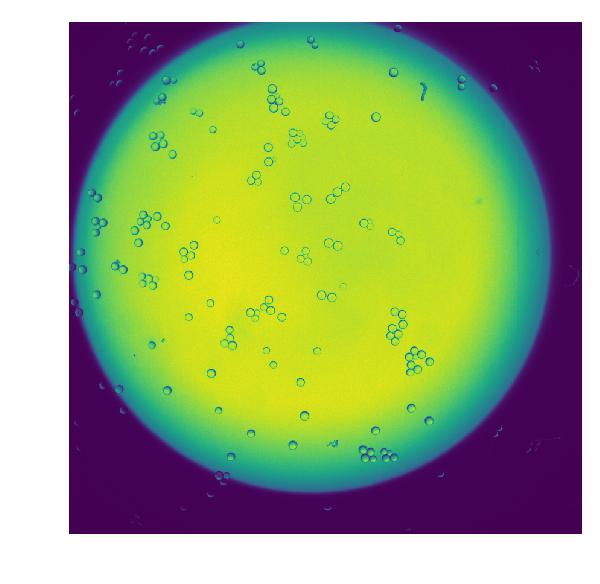

In [7]:
plt.figure(dpi=150)
plt.axis('off')
plt.tight_layout()
plt.imshow(mrbles_images['125 nM', 5, 'Brightfield']);  # set 63 nM, file #3 (Pyhton is 0-indexed), channel 'Brightfield'

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

Settings can be accessed via .settings. Use Tab to see options and CRTL+Tab to see documentation.

The circle_size parameters enables automated circle ROI finding. It will find the center and then creates a circular ROI, around that center with the radius provided in pixels.

Set bead_size to an estimated bead width in pixels. This will estimate area_min and area_max, which are used for filtering objects.

In [12]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65
find_mrbles.settings.parallelize = True  # Experimental method, does not work well on computers with limited resources.

### Start the mrbles bead finding

In [13]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Bead radius AVG: 14.35
Bead radius SD: 0.58
Bead radius CV: 4.01%
Number of beads in set 125 nM: 841
Number of beads in set 250 nM: 863
Number of beads in set 500 nM: 920
Number of beads in set 1000 nM: 969
Number of beads in set 2000 nM: 478
Number of beads in set Biotin: 3204
Total number of beads: 7275


### Different masked regions
The Find method provides several different regions of the bead, namely: 

In [14]:
find_mrbles['125 nM'].c

<xarray.DataArray 'c' (c: 6)>
array(['mask_full', 'mask_ring', 'mask_inside', 'mask_outside', 'mask_bkg',
       'mask_check'], dtype='<U12')
Coordinates:
  * c        (c) <U12 'mask_full' 'mask_ring' 'mask_inside' 'mask_outside' ...

The mask 'mask_check' gives you an image with the found circular region and the found beads.

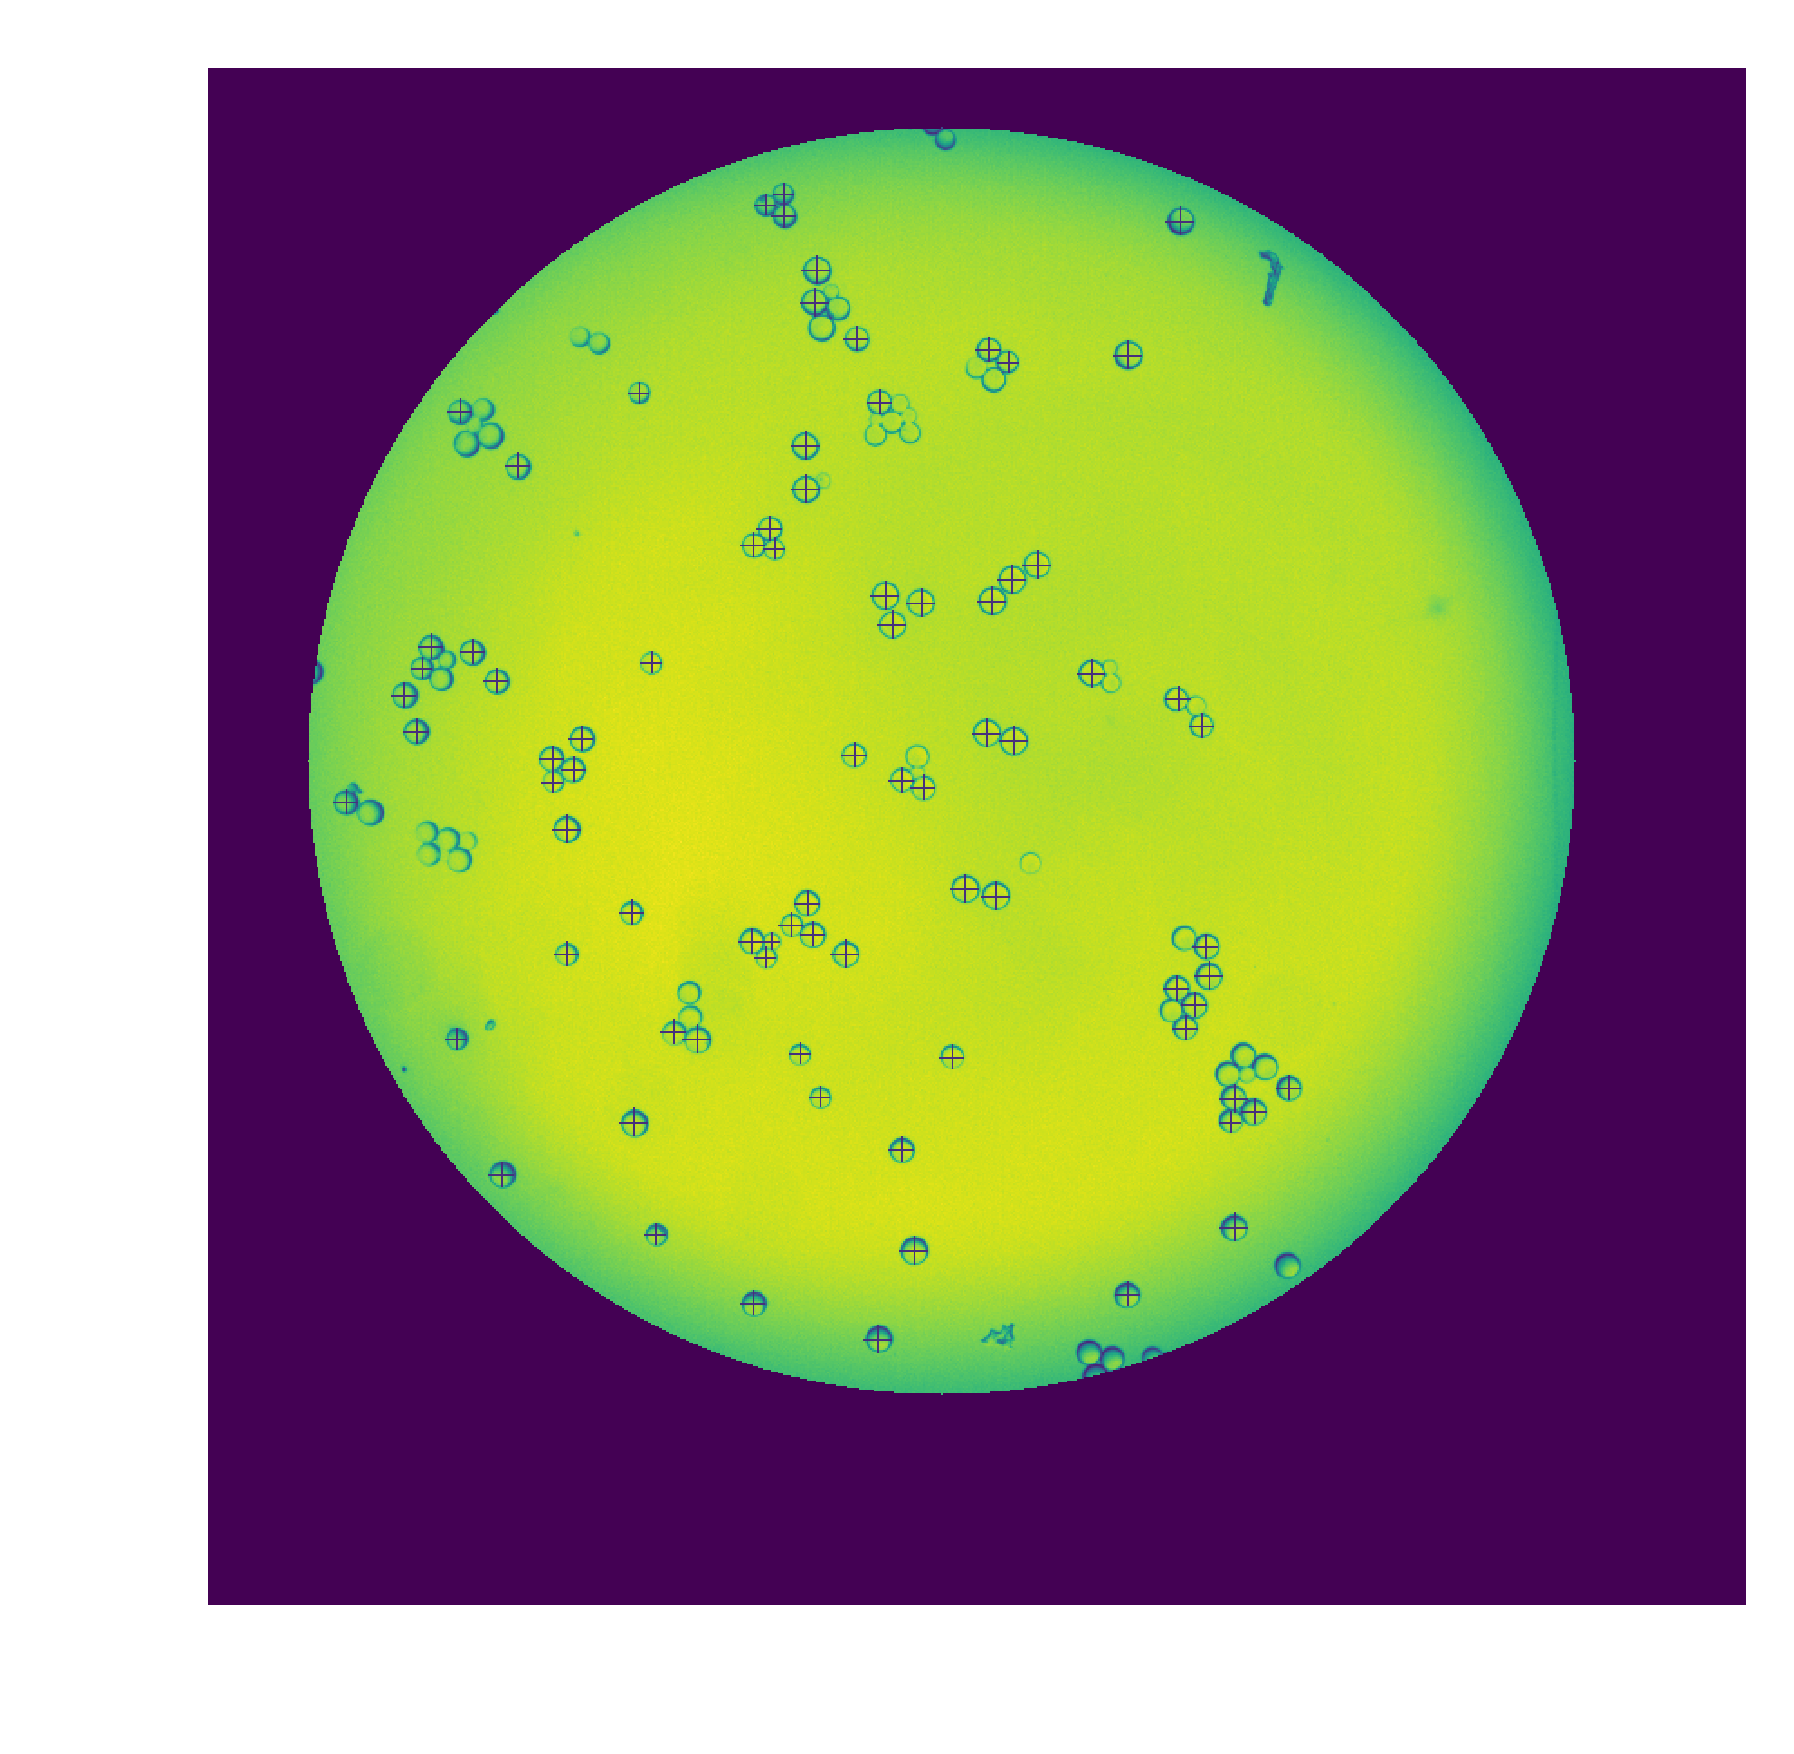

In [15]:
plt.figure(dpi=450)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['125 nM', 5, 'mask_check']);

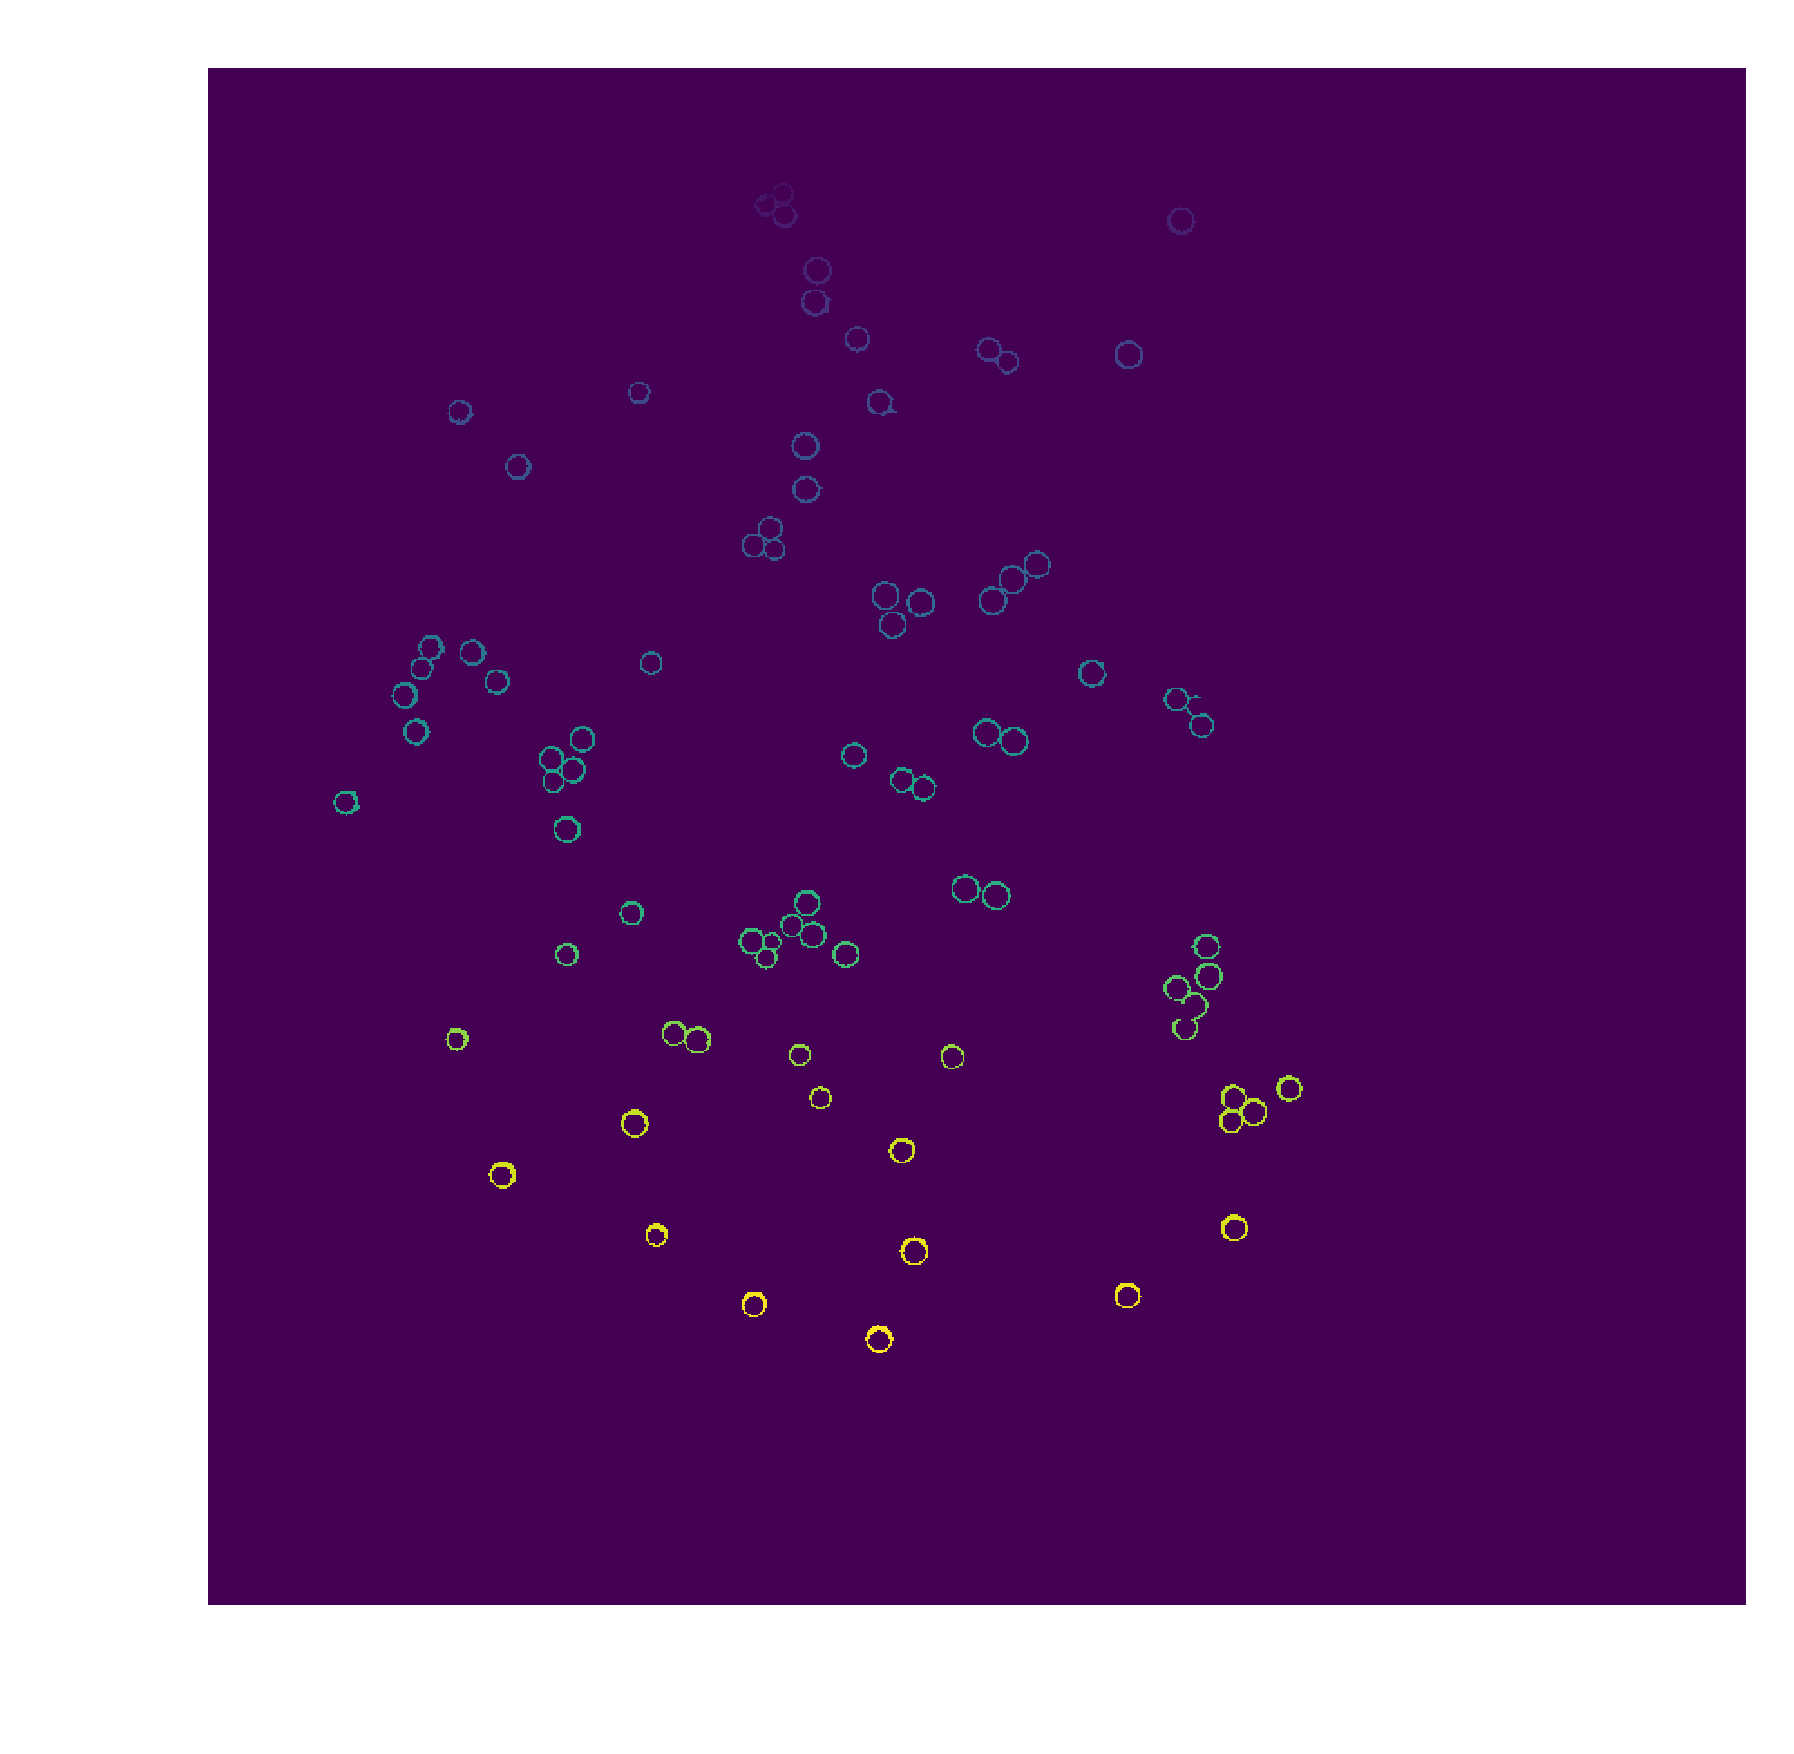

In [16]:
plt.figure(dpi=450)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['125 nM', 5, 'mask_ring']);

## Create Reference spectra
This uses a similar setup as Images() and Find(), in which you provide folders and patterns.

In [17]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180111 CN\20180111_CN_Final_Normal_biotinb_5"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180111_CN_Final_Normal_biotinb_5_MMStack_Pos0.ome.tif"
}

### Instatiating References()
Set bead_size as in Find().
crop_x/crop_y are the general (rectangular) ROI.
bkg_roi is the background region. Choose an empty spot in the 'bkg' image selected above.

In [18]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(390, 738), slice(377, 733)]

### Load References

In [19]:
spec_object.load()

Bead radius AVG: 15.65
Bead radius SD: 0.84
Bead radius CV: 5.38%
Number of beads in set Dy: 270
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Number of beads in set Eu: 203
Total number of beads: 1287


### Show plot and 'bkg' ROI
Background ROI should not show any beads.

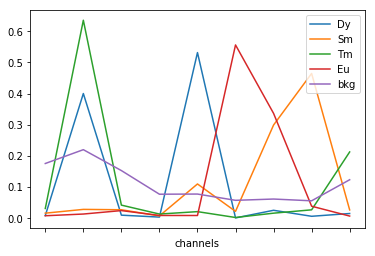

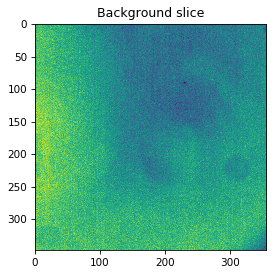

In [20]:
spec_object.plot()

## Spectral unmixing and get ratios
This will linearly unmix the lanthanide channels into unmixed lanthanide images, using the References() object above.

In [21]:
ratio_images = mrbles.Ratio(spec_object)

### Unmix images and get ratios
combine_data=data is for including the data inside the Ratio() object for later ease/use. Be careful with how many channels to include, since this will consume memory rapidly (since you are copying them into memory). Always include [] around the channel name, even if it is only 1 name, otherwise it will not copy its name and throws an error!

In [22]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images[:, :, ['Cy5']])

c:\python36\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [23]:
ratio_images['125 nM'].c

<xarray.DataArray 'c' (c: 9)>
array(['Cy5', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm', 'Tm_ratio',
       'bkg'], dtype=object)
Coordinates:
  * c        (c) object 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...

## Extract data from each MRBLE

In [24]:
extract_data = mrbles.Extract()

In [25]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [26]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 7277
Post-filter: 6859
Filtered: 418 (5.7%)


## Decode - Biotin

In [27]:
seq_file = pd.read_excel(r'C:\DATA\Huy\20180105_SEQ_CN_Final-Match-List.xlsx')
seq_file.loc[(seq_file.code==12), ('Dy', 'Sm', 'Tm')] = [0, 0.41682, 0.02844]
seq_file.loc[(seq_file.code==13), ('Dy', 'Sm', 'Tm')] = [0, 0.47785, 0.04081]

target = seq_file.loc[(seq_file.set=='match'), ['Dy', 'Sm', 'Tm']].values
sequences = seq_file.loc[(seq_file.set=='match')].reset_index(drop=True)

target_biotin = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
sequences_biotin = seq_file.reset_index(drop=True)

In [28]:
biotin_set = extract_data.data.loc[('Biotin')]

In [137]:
biotin_set

Cy5  Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
0  0    NaN         405.0        13515.5          13060.0           3.0   
   1    NaN         426.5        14138.5          13222.0           4.0   
   2    NaN         428.0        15621.5          15645.0           5.0   
   3    NaN         449.0        14640.0          13695.5           6.0   
   4    NaN         467.0        15137.5          15306.0           7.0   
   5    NaN         496.5        12286.0          11492.0           8.0   
   6    NaN         469.5        13055.0          12382.5           9.0   
   7    NaN         452.5        13695.0          13099.5          10.0   
   8    NaN         469.0        14515.0          13898.5          11.0   
   9    NaN         364.0        13886.0          14913.0          12.0   
   10   NaN         501.5        13949.0          13178.0          13.0   
   11   NaN         476.0        16933.5          16653.0          14.0   
   12   NaN         464.0        18694.0          19651.0          15.0   
   14   NaN         461.0        10711.0           9363.0          17.0   
   15   NaN         479.0        14546.0          13555.0          18.0   
   16   NaN         585.0        13560.5          12755.5          20.0   
   17   NaN         441.0        11761.0          11355.0          21.0   
   18   NaN         446.0        14317.0          12462.0          22.0   
   19   NaN         422.0        10658.0          10172.0          23.0   
   20   NaN         422.0        12050.0          10577.0          24.0   
   21   NaN         401.0        12349.0          11665.0          25.0   
   22   NaN         519.0        13598.0          12188.0          26.0   
   23   NaN         486.0        18961.5          15805.0          27.0   
   24   NaN         410.0        13846.0          13612.0          28.0   
   25   NaN         440.0        19393.0          19013.0          29.0   
   26   NaN         378.0        11109.0           9799.0          30.0   
   27   NaN         404.5        11226.0          10658.5          31.0   
   28   NaN         393.5        12653.0          11687.0          32.0   
   29   NaN         397.0        15921.0          14495.0          33.0   
   30   NaN         376.0        16157.0          14005.5          34.0   
...     ...           ...            ...              ...           ...   
27 234  NaN         466.0        14330.0          12515.0         255.0   
28 0    NaN         418.0        12434.5          11331.0           3.0   
   1    NaN         461.0        15217.0          15399.0           4.0   
   2    NaN         584.0        10839.0           9971.5           6.0   
   3    NaN         457.0        13609.0          13060.5           7.0   
   4    NaN         369.0         9975.0           9620.0           8.0   
   5    NaN         541.5        13464.0          12241.0           9.0   
   6    NaN         464.0        13064.0          12395.5          11.0   
   7    NaN        1419.0        11901.0          10054.0          12.0   
   8    NaN         595.5        11570.0          10681.0          13.0   
   9    NaN         508.5         9495.5           8745.0          14.0   
   10   NaN         374.0         9383.5           9095.0          15.0   
   11   NaN        7682.5         9916.0           9670.0          16.0   
   12   NaN         571.5        11014.0           9604.0          19.0   
   13   NaN         575.0        11869.5          11317.5          20.0   
   14   NaN         483.0        15193.0          13782.5          21.0   
   15   NaN         467.0        14133.0          13723.0          22.0   
   16   NaN         431.0         9083.5           8560.0          23.0   
   17   NaN         439.5        13279.0          12921.0          24.0   
   19   NaN         404.0         8970.0           8573.0          27.0   
   20   NaN         426.5        11235.0          10142.5          28.0   
   21   NaN         435.0        

In [135]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)
mrbles_decode_biotin.settings.icp.train = False

In [136]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=biotin_set)

Delta:  0.12003149237393067
Delta:  0.04951531899796268
Delta:  0.06960240202708376
Delta:  0.06314231468525298
Delta:  0.03487244476804345
Delta:  0.00773825854253489
Delta:  0.0005411850507896739
Delta:  0.0
Converged after: 8
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7288836739401287
AIC: 190830.2352643325
BIC: 193729.1327641267


### Subtract local background

In [34]:
extract_set_biotin = mrbles_decode_biotin.data.loc[(mrbles_decode_biotin.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set_biotin.loc[:, 'Cy5.mask_ring'] -= mrbles_decode_biotin.data.loc[:, ('Cy5.mask_bkg')]

In [140]:
extract_set_biotin

code   flag  Cy5.mask_ring
0  1      22  False        16656.5
   2       2  False        15099.0
   3       2  False        16678.0
   4      41  False        14383.0
   5      29  False        13363.5
   6      10  False        13368.5
   7      32  False        15352.0
   8      29  False        15487.5
   9      27  False        12611.0
   10     18  False        14817.5
   11     10  False        16738.0
   12     34  False        16703.0
   14     27  False        11801.0
   15     41  False        17040.0
   16     13  False        15019.5
   17     29  False        12341.0
   18     22  False        18403.0
   19     20  False        12962.0
   20     21  False        14370.0
   21      6  False        14066.0
   22     14  False        14842.0
   23     19  False        24447.0
   24     27  False        15997.0
   25     29  False        19438.0
   26     23  False        12420.0
   27     33  False        15788.5
   28     29  False        14525.5
   29     14  False        21402.0
   31     26  False        21704.5
1  0      22  False        11544.5
...      ...    ...            ...
27 234     5  False        18378.0
28 0      24  False        13855.0
   1      41  False        14393.0
   2      19  False        11679.0
   3      19  False        13282.0
   4      16  False        11297.0
   5      19  False        15261.5
   6      29  False        14218.0
   7      19  False        13929.0
   8      19  False        13886.5
   9      19  False        11750.5
   10     19  False        10243.0
   11     19  False         4270.5
   12     19  False        13865.5
   13     19  False        15363.0
   14     39  False        17567.0
   15     19  False        14149.0
   16     19  False        10737.5
   17     10  False        14526.5
   19     19  False        11050.0
   20     20  False        11968.5
   21     21  False        12162.0
   22     28  False        20569.0
   23     19  False         8466.0
   24     24  False        12085.0
   25     31  False        15843.5
   26      0  False        10448.5
   27     21  False        19324.0
   28     18  False        15322.0
   30     17  False        17234.0

[2942 rows x 3 columns]

### Analyze per-code data

In [35]:
mrbles_biotin_data = mrbles.Analyze(seq_list=sequences_biotin)

In [36]:
mrbles_biotin_data.analyze(extract_set_biotin)

In [37]:
mrbles_biotin_data.data

mean    median            sd           se    N        CV  \
code                                                                     
0     19314.815385  18638.00   3605.213011   450.651626   65  0.186655   
1     18524.653846  17872.50   3327.828426   379.241246   78  0.179643   
2     17908.477011  17401.00   3524.726006   380.080980   87  0.196819   
3     24290.617021  23072.75   4740.852998   491.603555   94  0.195172   
4     16435.985000  16406.25   3015.499946   303.069148  100  0.183469   
5     18697.528169  19027.50   2608.995434   311.834598   71  0.139537   
6     18081.628378  17634.75   5341.962406   625.229408   74  0.295436   
7     16503.317073  16274.50   3564.490487   396.054499   82  0.215986   
8     16675.933333  16549.75   3276.777864   426.600142   60  0.196497   
9     16966.301136  16775.75   2911.880878   312.186399   88  0.171627   
10    17443.071429  17481.75   2958.507998   300.390975   98  0.169609   
11    15096.586207  15595.00   2701.003738   510.441727   29  0.178915   
12    19309.433962  16969.00   6423.774920   890.817302   53  0.332675   
13    19850.920635  20296.00   4258.351518   540.811184   63  0.214517   
14    18107.597222  18155.75   2928.927203   347.599708   72  0.161751   
15    17105.316667  17573.75   3942.190613   513.229503   60  0.230466   
16    15097.612245  14771.00   3983.319801   574.942690   49  0.263838   
17    15083.782609  15641.50   2190.228556   466.958297   23  0.145204   
18    15799.008197  15832.00   2335.909997   301.564684   61  0.147852   
19    18011.465000  17125.25   4964.403291   498.941304  100  0.275625   
20    13304.734375  12694.50   2515.377370   451.775112   32  0.189059   
21    16166.691358  16347.50   3297.116487   368.628830   81  0.203945   
22    17113.492063  17099.00   2286.366922   290.368889   63  0.133600   
23    14887.538462  14900.50   2062.068826   412.413765   26  0.138510   
24    17142.000000  17320.50   2972.443266   416.225311   52  0.173401   
25    16838.294118  15869.00   3766.440820   532.655169   51  0.223683   
26    17262.742857  16738.00   3134.567061   537.573816   35  0.181580   
27    16896.963636  16045.00   5821.481421   792.203279   55  0.344528   
28    16639.279412  16199.50   3202.161515   557.424771   34  0.192446   
29    17343.640449  17051.50   3141.728570   334.909391   89  0.181146   
30    20392.398438  20444.00   3652.263502   460.141950   64  0.179099   
31    18124.598291  18134.50   4243.105756   393.962479  117  0.234108   
32    17939.281250  17714.25   3611.612513   342.799089  112  0.201324   
33    17951.983333  18153.00   2770.083445   514.391582   30  0.154305   
34    20716.948980  20426.50   5244.163292   756.929772   49  0.253134   
35    16325.697917  16083.25   2792.700099   407.357176   48  0.171062   
36    19112.664773  18841.25   3017.876834   323.550358   88  0.157899   
37    20942.103175  20396.00   4608.468590   585.276096   63  0.220058   
38    34430.586957  30162.50  14139.301461  2107.762615   46  0.410661   
39    19912.064935  19659.50   4087.614103   468.881495   77  0.205283   
40    20913.981818  20324.00   3860.670032   525.370647   55  0.184598   
41    19677.718750  19210.00   4233.253970   617.483554   48  0.215129   
42    19067.163265  18760.50   2862.082714   413.106056   49  0.150105   
43    15915.215909  15387.00   3149.277937   480.260383   44  0.197878   
44    22461.370690  21065.75   5327.210802   705.606308   58  0.237172   
45    18475.596774  18341.50   4692.182623   856.671422   31  0.253966   
46    20425.875000  21066.50   5817.192991  3358.557939    4  0.284795   
47    22453.515152  21470.00   5418.745413   957.907907   33  0.241332   

          set.sequence  set.code  
code                              
0      AGIVPIHVTHAPGEE         1  
1         HPVIVITGPHEE         2  
2         HPRIVITGPHEE         3  
3         HPLIVITGPHEE         4  
4         HPVIVIEGPHEE         5  
5         HPVIVLTGPHEE         6  
6         IPVIVITGPHEE         7 

## Decode - Concentrations

In [38]:
mrbles_decode = mrbles.Decode(target)

In [39]:
mrbles_decode.settings.icp.train = True

In [40]:
bead_set = extract_data.data

### Train bead-set by cycling thourgh good sets

In [53]:
mrbles_decode.decode(bead_set.loc['250 nM', ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')])

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1101: UserWarning:

Training mode: ON

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1105: UserWarning:

Training mode: ON



Delta:  0.015136251950106356
Delta:  0.0015370701818467583
Delta:  0.0009418681068248114
Delta:  0.0007448222093815208
Delta:  0.0006392482851856346
Delta:  0.0
Converged after: 6
Number of unique codes found: 33
Missing codes: [0 1]
Silhouette Coefficient: 0.5970644841750075
AIC: 119865.20709127153
BIC: 121499.70006134396


### Decode on whole set using trained mrbles_decode object, and combine with bead_set data

In [54]:
mrbles_decode.decode(bead_set.loc[:, ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=bead_set)

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1101: UserWarning:

Training mode: ON

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1105: UserWarning:

Training mode: ON



Delta:  0.021142147511370172
Delta:  0.02446777894142085
Delta:  0.019436726002178016
Delta:  0.005321035453569363
Delta:  0.002309780066608632
Delta:  0.001129897874741494
Delta:  0.0007507349259621561
Delta:  0.0004951538580153783
Delta:  0.0003605934037401487
Delta:  0.0004830438240218346
Delta:  0.00016543880961859844
Delta:  0.0002108824364109306
Delta:  2.820930506466873e-05
Converged after: 13
Number of unique codes found: 33
Missing codes: [0 1]
Silhouette Coefficient: 0.40144014196214595
AIC: 57541.12203869426
BIC: 59925.94964988152


### Analyze per-code data

In [57]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

Subtract local background

In [58]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set.loc[:, 'Cy5.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5.mask_bkg')]

In [139]:
extract_set

code   flag  Cy5.mask_ring
125 nM 0  0       5  False         1037.0
          1       8  False           -6.0
          2      15  False          632.0
          3      20  False         1614.0
       1  0      22  False          664.0
          2       9  False          -21.0
          3      13  False         6009.0
          4      20  False         1373.0
          5      19  False         1317.5
          6      23  False          213.0
          7       9  False           43.5
          8       8  False          -70.0
          9       9  False           11.5
          10     25  False          281.0
          12     29  False           16.0
          14     22  False          200.0
          15      6  False          914.0
          16      8  False          -22.5
          17     10  False        10048.0
          18     10  False         7323.0
          19     23  False          112.0
       2  0      27  False          858.5
          1      24  False          455.5
          2      30  False          -18.0
       3  0      25  False          255.5
          1      17  False         5393.0
       4  0       9  False           65.0
          1       9  False           79.0
          2       9  False           53.0
          3      11  False          -86.0
...             ...    ...            ...
Biotin 27 221    27  False        19723.5
          223    10  False        17752.5
          224    17  False        16706.0
          225    11  False        14073.0
          227    25  False        27224.0
          228     7  False        18922.0
          229     8  False        17182.5
          230    25  False        20704.0
          231    26  False        25513.5
          232    17  False        15503.0
          234     9  False        18378.0
       28 0      17  False        13855.0
          1      29  False        14393.0
          2       3  False        11679.0
          4      16  False        11297.0
          5       3  False        15261.5
          6      20  False        14218.0
          7       3  False        13929.0
          10      3  False        10243.0
          11      3  False         4270.5
          12      3  False        13865.5
          14     27  False        17567.0
          15      3  False        14149.0
          17     10  False        14526.5
          21     17  False        12162.0
          22     19  False        20569.0
          25     22  False        15843.5
          26      4  False        10448.5
          27     17  False        19324.0
          28     17  False        15322.0

[5692 rows x 3 columns]

In [59]:
mrbles_final.analyze(extract_set)

c:\python36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\python36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [60]:
mrbles_final.data

mean    median            sd           se    N  \
set     code                                                           
125 nM  3      2486.580645   2315.50   1219.727753   222.690801   31   
        4        35.550000     22.75     59.578708    19.859569   10   
        5       553.918919    495.50    295.473155    49.245526   37   
        6      1209.041667   1082.25    699.878277   211.021240   12   
        7       -63.077778    -44.00     97.603902    14.714342   45   
        8       -76.508333    -77.00     33.682029     4.385027   60   
        9        52.796296     56.00     46.022189     9.025694   27   
        10     5244.652174   5568.50   2809.844334   599.060825   23   
        11      597.653846     81.00   2026.382511   328.722651   39   
        12      -25.300000     -2.50     68.672848    34.336424    5   
        13     8523.589286   8954.75   2218.436547   426.938313   28   
        14     1784.500000   1723.25    484.215201   117.439436   18   
        15      235.914286    242.00    164.645354    28.236445   35   
        16      -45.425000    -29.25     88.907434    20.396764   20   
        17    20440.333333  21445.50   5040.738601  1222.558687   18   
        18      323.333333    336.50    102.282561    72.324692    3   
        19      934.785714     42.00   1764.277287   720.263186    7   
        20     1354.777778   1554.00    451.501637   159.629935    9   
        22      709.689655    664.00    314.287629    59.394779   29   
        23      115.629032    112.00     53.400490     9.749551   31   
        24      460.333333    444.00    188.690517    66.712172    9   
        25      337.132353    298.75    108.196194    18.834540   34   
        26      -78.107143    -86.75     36.240358    10.051267   14   
        27      971.241935    920.00    517.005738    94.391902   31   
        28      365.218750    257.75    219.811778    56.755157   16   
        29        7.416667     -5.50     61.268818    11.377334   30   
        30       -3.603448     -5.50     40.186071     7.594454   29   
        31      767.948276    818.00    413.360729    78.117835   29   
        33      -24.384615    -16.00     47.640543    13.752640   13   
250 nM  3      3912.275862   4125.00   1268.462806   239.716938   29   
...                    ...       ...           ...          ...  ...   
2000 nM 33      543.000000    543.00      0.000000          NaN    1   
Biotin  3     21415.155488  21709.50   5602.132714   438.792899  164   
        4     19547.434426  18745.00   3445.009903   444.748866   61   
        5     18505.108974  17828.50   3382.711477   385.495750   78   
        6     17965.943182  17409.00   3545.394261   380.106163   88   
        7     16599.340909  16329.00   3132.023534   477.629111   44   
        8     16391.720588  16406.25   3036.510890   302.144126  102   
        9     18697.528169  19027.50   2608.995434   311.834598   71   
        10    17824.794643  17593.50   4077.147224   315.499124  168   
        11    16753.393333  16660.00   3155.983780   258.548265  150   
        12    18405.843972  17526.00   4878.286469   412.290457  141   
        13    19982.266667  20350.00   4319.960437   562.410945   60   
        14    18029.540000  18128.00   2908.908299   338.153721   75   
        15    17105.316667  17573.75   3942.190613   513.229503   60   
        16    15510.020000  14777.00   4922.675493   703.239356   50   
        17    16280.593583  16381.50   2956.743837   216.798977  187   
        18    17041.908537  16502.25   5148.176255   572.019584   82   
        19    16477.914286  16073.50   3293.355051   564.805732   35   
        20    17320.863636  17046.25   3152.213666   337.952778   88   
        22    18141.974790  18134.50   4268.356339   392.934051  119   
        23    20242.862319  20327.00   3662.473349   444.140131   69   
        24    18466.016807  17922.00   3990.639599   367.368152  119   
        25    18367.188406  18168.50   3731.167720   318.77517

## Normalize data using biotin data

In [61]:
norm_data = mrbles_biotin_data.data
norm_max = norm_data['mean'].max()

In [62]:
norm_data['mean_scaled'] = mrbles_biotin_data.data['mean'] / norm_data['mean'].max()
norm_data['median_scaled'] = mrbles_biotin_data.data['median'] / norm_data['median'].max()
norm_data['sd_scaled'] = mrbles_biotin_data.data['sd'] / norm_data['mean'].max()
norm_data['se_scaled'] = mrbles_biotin_data.data['sd_scaled'] / np.sqrt(norm_data['N'])

In [68]:
norm_data

mean    median            sd           se    N        CV  \
code                                                                     
0     19314.815385  18638.00   3605.213011   450.651626   65  0.186655   
1     18524.653846  17872.50   3327.828426   379.241246   78  0.179643   
2     17908.477011  17401.00   3524.726006   380.080980   87  0.196819   
3     24290.617021  23072.75   4740.852998   491.603555   94  0.195172   
4     16435.985000  16406.25   3015.499946   303.069148  100  0.183469   
5     18697.528169  19027.50   2608.995434   311.834598   71  0.139537   
6     18081.628378  17634.75   5341.962406   625.229408   74  0.295436   
7     16503.317073  16274.50   3564.490487   396.054499   82  0.215986   
8     16675.933333  16549.75   3276.777864   426.600142   60  0.196497   
9     16966.301136  16775.75   2911.880878   312.186399   88  0.171627   
10    17443.071429  17481.75   2958.507998   300.390975   98  0.169609   
11    15096.586207  15595.00   2701.003738   510.441727   29  0.178915   
12    19309.433962  16969.00   6423.774920   890.817302   53  0.332675   
13    19850.920635  20296.00   4258.351518   540.811184   63  0.214517   
14    18107.597222  18155.75   2928.927203   347.599708   72  0.161751   
15    17105.316667  17573.75   3942.190613   513.229503   60  0.230466   
16    15097.612245  14771.00   3983.319801   574.942690   49  0.263838   
17    15083.782609  15641.50   2190.228556   466.958297   23  0.145204   
18    15799.008197  15832.00   2335.909997   301.564684   61  0.147852   
19    18011.465000  17125.25   4964.403291   498.941304  100  0.275625   
20    13304.734375  12694.50   2515.377370   451.775112   32  0.189059   
21    16166.691358  16347.50   3297.116487   368.628830   81  0.203945   
22    17113.492063  17099.00   2286.366922   290.368889   63  0.133600   
23    14887.538462  14900.50   2062.068826   412.413765   26  0.138510   
24    17142.000000  17320.50   2972.443266   416.225311   52  0.173401   
25    16838.294118  15869.00   3766.440820   532.655169   51  0.223683   
26    17262.742857  16738.00   3134.567061   537.573816   35  0.181580   
27    16896.963636  16045.00   5821.481421   792.203279   55  0.344528   
28    16639.279412  16199.50   3202.161515   557.424771   34  0.192446   
29    17343.640449  17051.50   3141.728570   334.909391   89  0.181146   
30    20392.398438  20444.00   3652.263502   460.141950   64  0.179099   
31    18124.598291  18134.50   4243.105756   393.962479  117  0.234108   
32    17939.281250  17714.25   3611.612513   342.799089  112  0.201324   
33    17951.983333  18153.00   2770.083445   514.391582   30  0.154305   
34    20716.948980  20426.50   5244.163292   756.929772   49  0.253134   
35    16325.697917  16083.25   2792.700099   407.357176   48  0.171062   
36    19112.664773  18841.25   3017.876834   323.550358   88  0.157899   
37    20942.103175  20396.00   4608.468590   585.276096   63  0.220058   
38    34430.586957  30162.50  14139.301461  2107.762615   46  0.410661   
39    19912.064935  19659.50   4087.614103   468.881495   77  0.205283   
40    20913.981818  20324.00   3860.670032   525.370647   55  0.184598   
41    19677.718750  19210.00   4233.253970   617.483554   48  0.215129   
42    19067.163265  18760.50   2862.082714   413.106056   49  0.150105   
43    15915.215909  15387.00   3149.277937   480.260383   44  0.197878   
44    22461.370690  21065.75   5327.210802   705.606308   58  0.237172   
45    18475.596774  18341.50   4692.182623   856.671422   31  0.253966   
46    20425.875000  21066.50   5817.192991  3358.557939    4  0.284795   
47    22453.515152  21470.00   5418.745413   957.907907   33  0.241332   

          set.sequence  set.code  mean_scaled  median_scaled  sd_scaled  \
code                                                                      
0      AGIVPIHVTHAPGEE         1     0.560978       0.617920   0.104710   
1         HPVIVITGPHEE         2     0.538029       0.592540   0.096653   
2         HPR

In [109]:
# norm_data.to_csv("C:/Users/bjorn/Desktop/20180207 - Calibration Biotin.csv")

In [69]:
beads_data = mrbles_final.data

In [70]:
beads_data

mean    median            sd           se    N  \
set     code                                                           
125 nM  3      2486.580645   2315.50   1219.727753   222.690801   31   
        4        35.550000     22.75     59.578708    19.859569   10   
        5       553.918919    495.50    295.473155    49.245526   37   
        6      1209.041667   1082.25    699.878277   211.021240   12   
        7       -63.077778    -44.00     97.603902    14.714342   45   
        8       -76.508333    -77.00     33.682029     4.385027   60   
        9        52.796296     56.00     46.022189     9.025694   27   
        10     5244.652174   5568.50   2809.844334   599.060825   23   
        11      597.653846     81.00   2026.382511   328.722651   39   
        12      -25.300000     -2.50     68.672848    34.336424    5   
        13     8523.589286   8954.75   2218.436547   426.938313   28   
        14     1784.500000   1723.25    484.215201   117.439436   18   
        15      235.914286    242.00    164.645354    28.236445   35   
        16      -45.425000    -29.25     88.907434    20.396764   20   
        17    20440.333333  21445.50   5040.738601  1222.558687   18   
        18      323.333333    336.50    102.282561    72.324692    3   
        19      934.785714     42.00   1764.277287   720.263186    7   
        20     1354.777778   1554.00    451.501637   159.629935    9   
        22      709.689655    664.00    314.287629    59.394779   29   
        23      115.629032    112.00     53.400490     9.749551   31   
        24      460.333333    444.00    188.690517    66.712172    9   
        25      337.132353    298.75    108.196194    18.834540   34   
        26      -78.107143    -86.75     36.240358    10.051267   14   
        27      971.241935    920.00    517.005738    94.391902   31   
        28      365.218750    257.75    219.811778    56.755157   16   
        29        7.416667     -5.50     61.268818    11.377334   30   
        30       -3.603448     -5.50     40.186071     7.594454   29   
        31      767.948276    818.00    413.360729    78.117835   29   
        33      -24.384615    -16.00     47.640543    13.752640   13   
250 nM  3      3912.275862   4125.00   1268.462806   239.716938   29   
...                    ...       ...           ...          ...  ...   
2000 nM 33      543.000000    543.00      0.000000          NaN    1   
Biotin  3     21415.155488  21709.50   5602.132714   438.792899  164   
        4     19547.434426  18745.00   3445.009903   444.748866   61   
        5     18505.108974  17828.50   3382.711477   385.495750   78   
        6     17965.943182  17409.00   3545.394261   380.106163   88   
        7     16599.340909  16329.00   3132.023534   477.629111   44   
        8     16391.720588  16406.25   3036.510890   302.144126  102   
        9     18697.528169  19027.50   2608.995434   311.834598   71   
        10    17824.794643  17593.50   4077.147224   315.499124  168   
        11    16753.393333  16660.00   3155.983780   258.548265  150   
        12    18405.843972  17526.00   4878.286469   412.290457  141   
        13    19982.266667  20350.00   4319.960437   562.410945   60   
        14    18029.540000  18128.00   2908.908299   338.153721   75   
        15    17105.316667  17573.75   3942.190613   513.229503   60   
        16    15510.020000  14777.00   4922.675493   703.239356   50   
        17    16280.593583  16381.50   2956.743837   216.798977  187   
        18    17041.908537  16502.25   5148.176255   572.019584   82   
        19    16477.914286  16073.50   3293.355051   564.805732   35   
        20    17320.863636  17046.25   3152.213666   337.952778   88   
        22    18141.974790  18134.50   4268.356339   392.934051  119   
        23    20242.862319  20327.00   3662.473349   444.140131   69   
        24    18466.016807  17922.00   3990.639599   367.368152  119   
        25    18367.188406  18168.50   3731.167720   318.77517

In [71]:
set_codes = np.unique(beads_data['set.code'])

In [72]:
for code in set_codes:
    norm_mean = norm_data.loc[norm_data['set.code'] == code, 'mean_scaled'].values
    norm_sd = norm_data.loc[norm_data['set.code'] == code, 'sd_scaled'].values
    
    data_mean = beads_data.loc[beads_data['set.code'] == code, 'mean'].values
    data_median = beads_data.loc[beads_data['set.code'] == code, 'median'].values
    data_sd = beads_data.loc[beads_data['set.code'] == code, 'sd'].values
    data_n = beads_data.loc[beads_data['set.code'] == code, 'N'].values
    
    mean_norm = (data_mean / norm_mean)
    median_norm = (data_median / norm_mean)
    sd_norm = np.abs(mean_norm) * (np.sqrt((data_sd / data_mean) ** 2 + (norm_sd / norm_mean)**2))
    cv_norm = mean_norm / sd_norm
    se_norm = sd_norm / np.sqrt(data_n)
    
    beads_data.loc[beads_data['set.code'] == code, 'mean_norm'] = mean_norm
    beads_data.loc[beads_data['set.code'] == code, 'median_norm'] = median_norm
    beads_data.loc[beads_data['set.code'] == code, 'sd_norm'] = sd_norm
    beads_data.loc[beads_data['set.code'] == code, 'cv_norm'] = cv_norm
    beads_data.loc[beads_data['set.code'] == code, 'se_norm'] = se_norm

In [73]:
beads_data

mean    median            sd           se    N  \
set     code                                                           
125 nM  3      2486.580645   2315.50   1219.727753   222.690801   31   
        4        35.550000     22.75     59.578708    19.859569   10   
        5       553.918919    495.50    295.473155    49.245526   37   
        6      1209.041667   1082.25    699.878277   211.021240   12   
        7       -63.077778    -44.00     97.603902    14.714342   45   
        8       -76.508333    -77.00     33.682029     4.385027   60   
        9        52.796296     56.00     46.022189     9.025694   27   
        10     5244.652174   5568.50   2809.844334   599.060825   23   
        11      597.653846     81.00   2026.382511   328.722651   39   
        12      -25.300000     -2.50     68.672848    34.336424    5   
        13     8523.589286   8954.75   2218.436547   426.938313   28   
        14     1784.500000   1723.25    484.215201   117.439436   18   
        15      235.914286    242.00    164.645354    28.236445   35   
        16      -45.425000    -29.25     88.907434    20.396764   20   
        17    20440.333333  21445.50   5040.738601  1222.558687   18   
        18      323.333333    336.50    102.282561    72.324692    3   
        19      934.785714     42.00   1764.277287   720.263186    7   
        20     1354.777778   1554.00    451.501637   159.629935    9   
        22      709.689655    664.00    314.287629    59.394779   29   
        23      115.629032    112.00     53.400490     9.749551   31   
        24      460.333333    444.00    188.690517    66.712172    9   
        25      337.132353    298.75    108.196194    18.834540   34   
        26      -78.107143    -86.75     36.240358    10.051267   14   
        27      971.241935    920.00    517.005738    94.391902   31   
        28      365.218750    257.75    219.811778    56.755157   16   
        29        7.416667     -5.50     61.268818    11.377334   30   
        30       -3.603448     -5.50     40.186071     7.594454   29   
        31      767.948276    818.00    413.360729    78.117835   29   
        33      -24.384615    -16.00     47.640543    13.752640   13   
250 nM  3      3912.275862   4125.00   1268.462806   239.716938   29   
...                    ...       ...           ...          ...  ...   
2000 nM 33      543.000000    543.00      0.000000          NaN    1   
Biotin  3     21415.155488  21709.50   5602.132714   438.792899  164   
        4     19547.434426  18745.00   3445.009903   444.748866   61   
        5     18505.108974  17828.50   3382.711477   385.495750   78   
        6     17965.943182  17409.00   3545.394261   380.106163   88   
        7     16599.340909  16329.00   3132.023534   477.629111   44   
        8     16391.720588  16406.25   3036.510890   302.144126  102   
        9     18697.528169  19027.50   2608.995434   311.834598   71   
        10    17824.794643  17593.50   4077.147224   315.499124  168   
        11    16753.393333  16660.00   3155.983780   258.548265  150   
        12    18405.843972  17526.00   4878.286469   412.290457  141   
        13    19982.266667  20350.00   4319.960437   562.410945   60   
        14    18029.540000  18128.00   2908.908299   338.153721   75   
        15    17105.316667  17573.75   3942.190613   513.229503   60   
        16    15510.020000  14777.00   4922.675493   703.239356   50   
        17    16280.593583  16381.50   2956.743837   216.798977  187   
        18    17041.908537  16502.25   5148.176255   572.019584   82   
        19    16477.914286  16073.50   3293.355051   564.805732   35   
        20    17320.863636  17046.25   3152.213666   337.952778   88   
        22    18141.974790  18134.50   4268.356339   392.934051  119   
        23    20242.862319  20327.00   3662.473349   444.140131   69   
        24    18466.016807  17922.00   3990.639599   367.368152  119   
        25    18367.188406  18168.50   3731.167720   318.77517

In [108]:
# beads_data.to_csv(r'20180213 - Per-Code data.csv')

In [77]:
bead_set1 = mrbles_decode.data

confidence = 0.95

colors = np.multiply(bead_set1[(bead_set1.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set1.loc[(bead_set1.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set1.loc[(bead_set1.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set1.loc[(bead_set1.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set1.loc[(bead_set1.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [78]:
bead_set = mrbles_decode_biotin.data

confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target_biotin[:,0],
    y=target_biotin[:,1],
    z=target_biotin[:,2],
    text=list(range(1, len(target_biotin)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode_biotin.settings.gmm.means[:,0],
    y=mrbles_decode_biotin.settings.gmm.means[:,1],
    z=mrbles_decode_biotin.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# More analysis

In [80]:
bead_set  # Per-bead data

Cy5  Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
0  0    NaN         405.0        13515.5          13060.0           3.0   
   1    NaN         426.5        14138.5          13222.0           4.0   
   2    NaN         428.0        15621.5          15645.0           5.0   
   3    NaN         449.0        14640.0          13695.5           6.0   
   4    NaN         467.0        15137.5          15306.0           7.0   
   5    NaN         496.5        12286.0          11492.0           8.0   
   6    NaN         469.5        13055.0          12382.5           9.0   
   7    NaN         452.5        13695.0          13099.5          10.0   
   8    NaN         469.0        14515.0          13898.5          11.0   
   9    NaN         364.0        13886.0          14913.0          12.0   
   10   NaN         501.5        13949.0          13178.0          13.0   
   11   NaN         476.0        16933.5          16653.0          14.0   
   12   NaN         464.0        18694.0          19651.0          15.0   
   14   NaN         461.0        10711.0           9363.0          17.0   
   15   NaN         479.0        14546.0          13555.0          18.0   
   16   NaN         585.0        13560.5          12755.5          20.0   
   17   NaN         441.0        11761.0          11355.0          21.0   
   18   NaN         446.0        14317.0          12462.0          22.0   
   19   NaN         422.0        10658.0          10172.0          23.0   
   20   NaN         422.0        12050.0          10577.0          24.0   
   21   NaN         401.0        12349.0          11665.0          25.0   
   22   NaN         519.0        13598.0          12188.0          26.0   
   23   NaN         486.0        18961.5          15805.0          27.0   
   24   NaN         410.0        13846.0          13612.0          28.0   
   25   NaN         440.0        19393.0          19013.0          29.0   
   26   NaN         378.0        11109.0           9799.0          30.0   
   27   NaN         404.5        11226.0          10658.5          31.0   
   28   NaN         393.5        12653.0          11687.0          32.0   
   29   NaN         397.0        15921.0          14495.0          33.0   
   30   NaN         376.0        16157.0          14005.5          34.0   
...     ...           ...            ...              ...           ...   
27 234  NaN         466.0        14330.0          12515.0         255.0   
28 0    NaN         418.0        12434.5          11331.0           3.0   
   1    NaN         461.0        15217.0          15399.0           4.0   
   2    NaN         584.0        10839.0           9971.5           6.0   
   3    NaN         457.0        13609.0          13060.5           7.0   
   4    NaN         369.0         9975.0           9620.0           8.0   
   5    NaN         541.5        13464.0          12241.0           9.0   
   6    NaN         464.0        13064.0          12395.5          11.0   
   7    NaN        1419.0        11901.0          10054.0          12.0   
   8    NaN         595.5        11570.0          10681.0          13.0   
   9    NaN         508.5         9495.5           8745.0          14.0   
   10   NaN         374.0         9383.5           9095.0          15.0   
   11   NaN        7682.5         9916.0           9670.0          16.0   
   12   NaN         571.5        11014.0           9604.0          19.0   
   13   NaN         575.0        11869.5          11317.5          20.0   
   14   NaN         483.0        15193.0          13782.5          21.0   
   15   NaN         467.0        14133.0          13723.0          22.0   
   16   NaN         431.0         9083.5           8560.0          23.0   
   17   NaN         439.5        13279.0          12921.0          24.0   
   19   NaN         404.0         8970.0           8573.0          27.0   
   20   NaN         426.5        11235.0          10142.5          28.0   
   21   NaN         435.0        

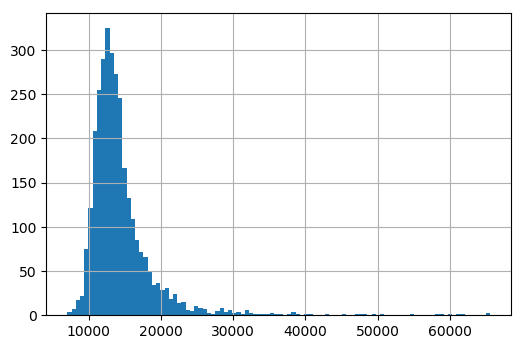

In [112]:
plt.figure(dpi=100)
bead_set.loc[:, 'Cy5.mask_inside'].hist(bins=100);

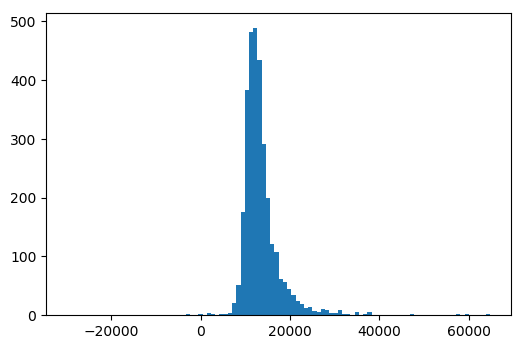

In [111]:
plt.figure(dpi=100)
cy5_min_bkg = (bead_set.loc[:, 'Cy5.mask_inside'] - bead_set.loc[:, 'Cy5.mask_bkg']).dropna()
plt.hist(cy5_min_bkg, bins=100);

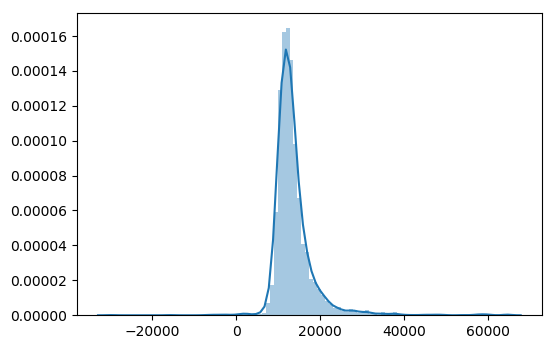

In [110]:
plt.figure(dpi=100)
sns.distplot(cy5_min_bkg, bins=100);

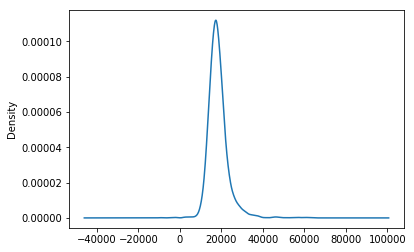

In [150]:
extract_set_biotin.loc[:, 'Cy5.mask_ring'].plot.kde();

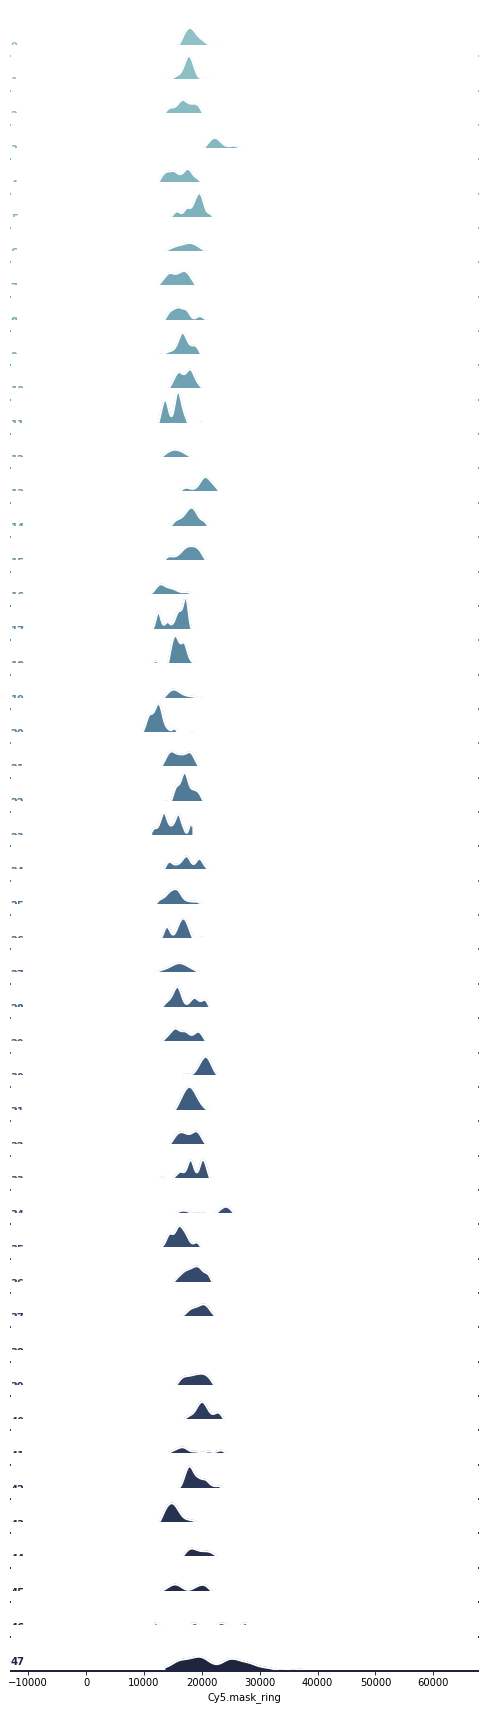

In [158]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(bead_set.code.unique()), rot=-.25, light=.7)
g = sns.FacetGrid(extract_set_biotin, row="code", hue="code", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Cy5.mask_ring", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Cy5.mask_ring", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Cy5.mask_ring")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)